# Model Classification Multi Classes


In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# drop 'id' column
df = df.drop(columns='Id')

In [4]:
# use one hot coding cz categorical data
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
new_df = pd.concat([df, category], axis=1) # add category that made before from one hot coding
new_df = new_df.drop(columns='Species') # drop 'Species' column
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [6]:
# data frame > array
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [7]:
# Split attribute and label
# Choose the first 4 columns as attribute (Pilih 4 kolom pertama untuk dijadikan sebagai atribut)
X = dataset[:,0:4]
# Choose the first 3 columns as label (Pilih 3 kolom terakhir sebagai label)
y = dataset[:,4:7]

In [8]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
# split data train and data test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [10]:
# arcitecture
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),]) # softmax > usually use for class. multy classes

In [12]:
# optimizer and loss
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 10ms/step - loss: 1.1825 - accuracy: 0.3143
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1334 - accuracy: 0.3143
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1014 - accuracy: 0.3143
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0667 - accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0383 - accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0122 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9844 - accuracy: 0.6667
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9568 - accuracy: 0.6762
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9291 - accuracy: 0.6762
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8998 - accuracy: 0.6762
Epoch 11/100
4/4 [========

In [14]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 1s 8ms/step - loss: 0.0637 - accuracy: 0.9778


[0.0636812075972557, 0.9777777791023254]

# Plot Loss and Accuracy

In [15]:
import matplotlib.pyplot as plt

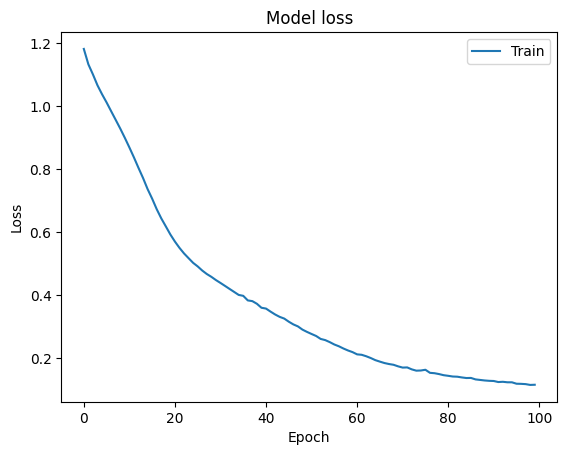

In [16]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

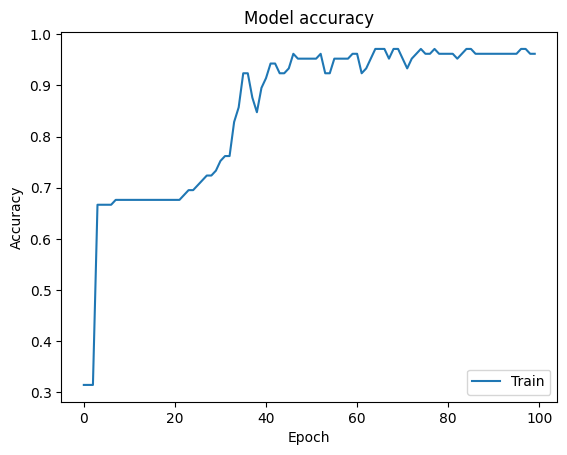

In [17]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# Using callbacks

In [5]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [7]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 7ms/step - loss: 1.0908 - accuracy: 0.3714
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0518 - accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0188 - accuracy: 0.6381
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9873 - accuracy: 0.6762
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9558 - accuracy: 0.6762
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9244 - accuracy: 0.6857
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8916 - accuracy: 0.7905
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8581 - accuracy: 0.8286
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8249 - accuracy: 0.8571
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7916 - accuracy: 0.8000
Epoch 11/50
4/4 [======================

# Using dataset from Tensorflow library

In [8]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [9]:
mnist = tf.keras.datasets.mnist

In [10]:
# spliting dataset
 (gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


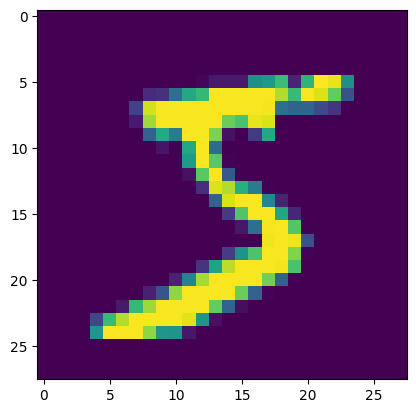

In [11]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [12]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2495 - accuracy: 0.9286
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1093 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0457 - accuracy: 0.9863


# Using Batch Loading

In [15]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2604 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1158 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0784 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0584 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0458 - accuracy: 0.9860


In [17]:
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9936
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0200 - accuracy: 0.9950
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0174 - accuracy: 0.9960
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0154 - accuracy: 0.9969
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0138 - accuracy: 0.9971
